# Presenting predictions

In [1]:
#imports 
from matplotlib import pyplot as plpy
import pandas as pd
import numpy as np
import cv2
import sys
sys.path.append('../src')

import models.model as demo
from data.generator import build_masks

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [2]:
PROJECT_PATH = '/home/tomasmizera/school/nsiete/nsiete-project/project/'

First, we create model

In [3]:
model = demo.create_model()

Second, load saved model

In [4]:
model.load_weights(PROJECT_PATH + 'models/model.ckpt')

Third, get data generator

In [5]:
data_generator = demo.train_generator

Fourth, we get sample data, store true labels and prepare X for prediction

In [6]:
X, Y = data_generator.__getitem__(0)

In [7]:
X.shape

(32, 256, 384, 3)

In [8]:
Y.shape

(32, 256, 384, 4)

**X** - consists of images (batch size * (resolution) * channels)  
**Y** - masks for every cloud type (batch size * (resolution) * num of cloud classes)

In [9]:
# one pixel for each channel -- color
X[0][0][0]

array([0.3546837 , 0.37036997, 0.37612975])

Next, predict mask for input image X

In [10]:
predicted = model.predict(X)

In [11]:
predicted.shape

(32, 256, 384, 4)

In [12]:
predicted_masks = predicted.round().astype(int)

In [13]:
predicted_masks[0][0][0]

array([0, 0, 0, 0])

Output shape tells about each pixel whether specific cloud type is present in this pixel

---

**Visualization of outputs**

Used images in this batch (from generator)

In [14]:
data_generator.latest_images[:5]

['9ba0225.jpg', 'ff00e81.jpg', '9a9d599.jpg', '1dacc16.jpg', '72e4b6e.jpg']

In [17]:
sample_pic = cv2.imread(PROJECT_PATH + 'data/train_images/' + data_generator.latest_images[0])
sample_pic.shape

(1400, 2100, 3)

In [31]:
# Helper functions

print_image = lambda pic: plpy.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
resize_image = lambda pic: cv2.resize(pic, (384, 256))

"""
ignore_background copies visible pixels from sattelite to new image with mask applied
"""
def combine(img_mask, img_origin):
    
    result = np.zeros_like(img_origin)
    result[np.where(img_mask==1)] = img_origin[np.where(img_mask==1)]
    
    return result

In [18]:
true_mask = Y[0][:,:,0]
predicted_mask = predicted_masks[0][:,:,0]
in_image = resize_image(sample_pic)

In [19]:
true_mask.shape

(256, 384)

In [20]:
predicted_mask.shape

(256, 384)

In [21]:
in_image.shape

(256, 384, 3)

---

**Now to visualization :)**

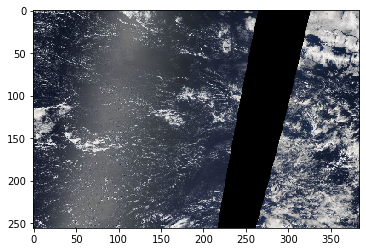

In [24]:
print_image(in_image)

True mask:

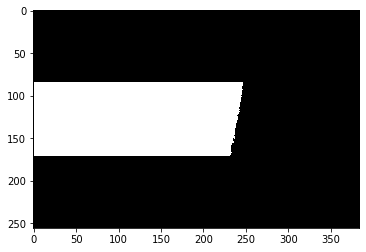

In [27]:
plpy.imshow(true_mask, cmap="gray")

Predicted mask:

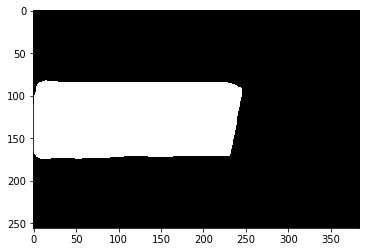

In [26]:
plpy.imshow(predicted_mask, cmap="gray")

**All together:**

Visualizating first predicted image for single class

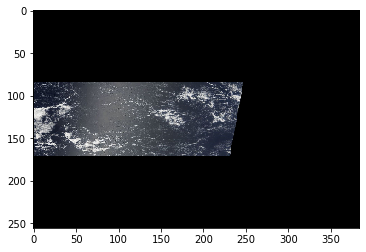

In [34]:
print_image(combine(true_mask, in_image))

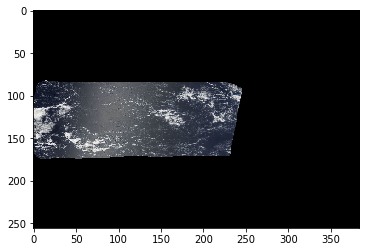

In [35]:
print_image(combine(predicted_mask, in_image))

---